<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/Tugas%20Besar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data**

In [7]:
%%writefile data_customer.csv
CustomerID,Age,AnnualIncome,SpendingScore
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
6,22,17,76
7,35,18,6
8,23,18,94
9,64,19,3
10,30,19,72
11,67,20,14
12,35,20,99
13,58,21,15
14,24,21,77
15,37,22,13
16,22,22,79
17,35,23,35
18,20,23,66
19,52,24,29
20,18,24,98

Overwriting data_customer.csv


# **1. Pengolahan Data**

In [25]:
# @title 1.a. Baca file data_customer.csv menggunakan pandas.
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import os
from google.colab import drive
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

dataset = pd.read_csv('/content/data_customer.csv')

In [9]:
# @title 1.b. Tampilkan 5 data pertama.
dataset.head()

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [16]:
# @title 1.c. Tampilkan informasi awal dataset: jumlah data, nama kolom, dan tipe data
print("=== Jumlah data ===")
x, y = dataset.shape
print(f"Jumlah data: {x}")
print(f"Jumlah baris: {y}")

print("  ")
print("=== nama kolom dan tipe data ===")
dataset.dtypes

=== Jumlah data ===
Jumlah data: 20
Jumlah baris: 4
  
=== nama kolom dan tipe data ===


,0
CustomerID,int64
Age,int64
AnnualIncome,int64
SpendingScore,int64


# **2. Pembersihan Data**

In [17]:
# @title 2.a. Chek apakah ada missing value.?
dataset.isnull().sum()

,0
CustomerID,0
Age,0
AnnualIncome,0
SpendingScore,0


In [18]:
# @title 2.b. Tangani data yang hilang (jika ada) dengan pendekatan yang tepat
print("Tidak ada")

Tidak ada


In [19]:
# @title 2.c. Deteksi dan tangani outlier pada kolom Age, AnnualIncome, dan SpendingScore jika ada.
print("Tidak ada")

Tidak ada


# **3. Pemrosesan Data**

In [27]:
# @title 3.a. Lakukan normalisasi fitur numerik menggunakan Min-Max Scaling atau Standard Scaler.
scaler = MinMaxScaler()
df = dataset.copy()

df[['Age', 'AnnualIncome', 'SpendingScore']]= scaler.fit_transform(dataset[['Age', 'AnnualIncome', 'SpendingScore']])

In [31]:
# @title 3.b. Buat scatter plot sebelum dan sesudah normalisasi untuk membandingkan persebaran data.
print("Before")
dataset.head()

Before


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [32]:
print("After")
df.head()

After


,CustomerID,Age,AnnualIncome,SpendingScore
0,1,0.020408,0.000000,0.375000
1,2,0.061224,0.000000,0.812500
2,3,0.040816,0.111111,0.031250
3,4,0.102041,0.111111,0.770833
4,5,0.265306,0.222222,0.385417


# **4. Clustering dengan K-Means**

In [52]:
# @title 4.a. Tentukan jumlah klaster optimal menggunakan metode Elbow.
X = dataset.iloc[:, [2, 3]]
X

,AnnualIncome,SpendingScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
7,18,94
8,19,3
9,19,72


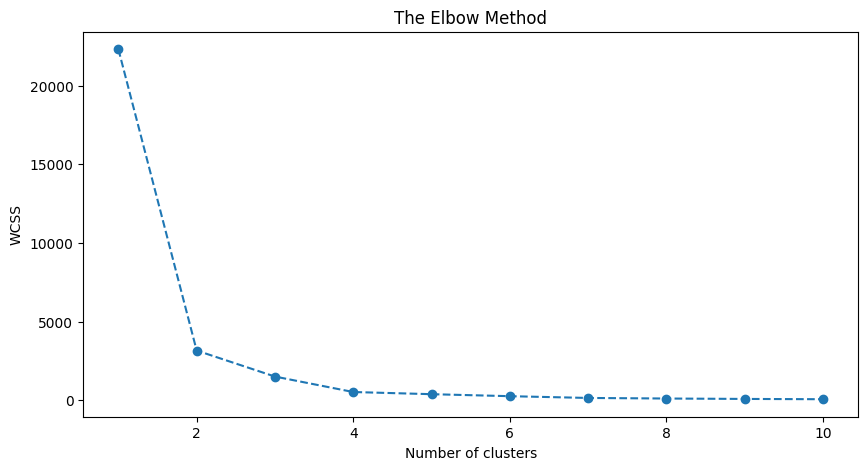

In [43]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
# @title 4.b. Terapkan algoritma K-Means Clustering untuk membagi pelanggan ke dalam beberapa segmen.
print("Cluster terbaik di 2")
kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

Cluster terbaik di 2


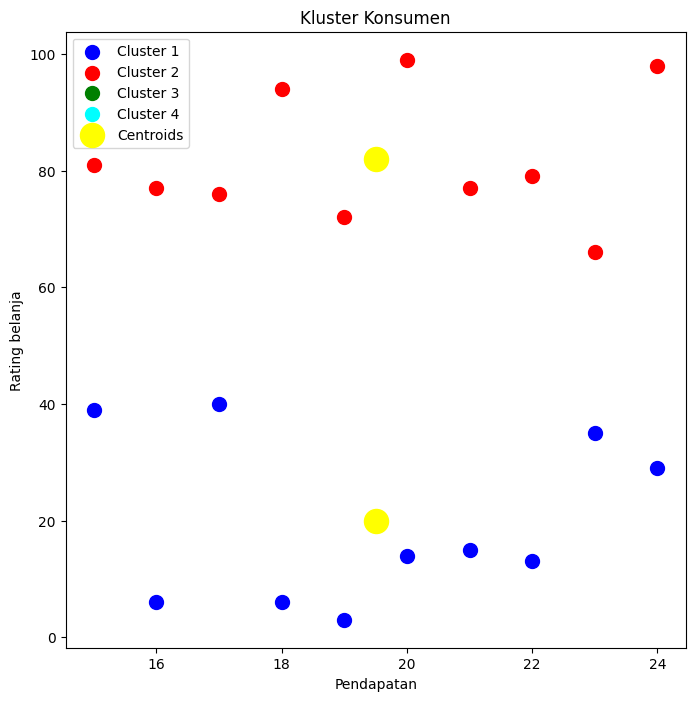

In [57]:
# @title 4.c. Tampilkan hasil klaster pada plot 2D menggunakan fitur AnnualIncome dan SpendingScore.
plt.figure(figsize=(8, 8))
X_np = X.values
plt.scatter(X_np[y_kmeans == 0, 0], X_np[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X_np[y_kmeans == 1, 0], X_np[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X_np[y_kmeans == 2, 0], X_np[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X_np[y_kmeans == 3, 0], X_np[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kluster Konsumen')
plt.xlabel('Pendapatan')
plt.ylabel('Rating belanja')
plt.legend()
plt.show()

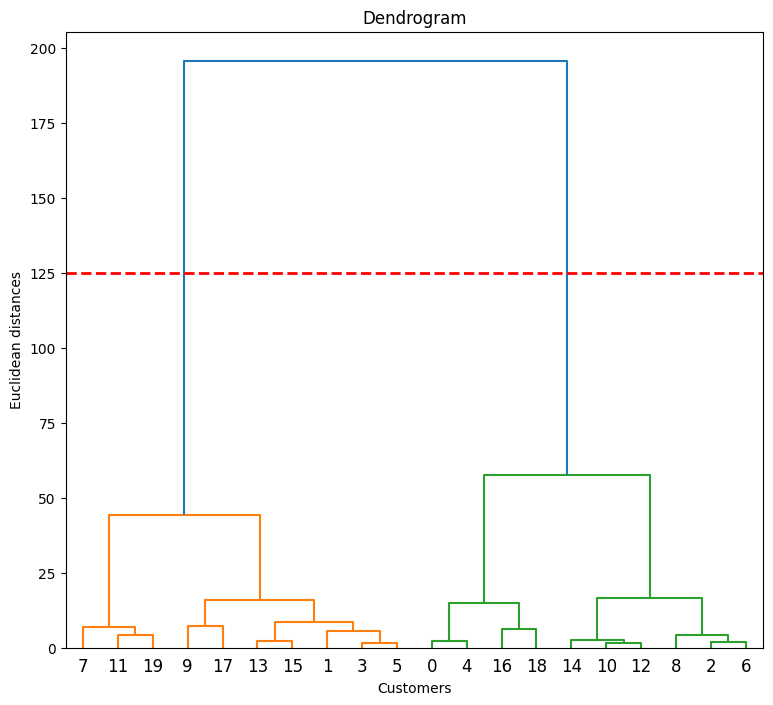

In [58]:
# @title 4.d. Bonus. Menentukan Clustering terbaik dari Hierarchy
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(9,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.axhline(y=125, color='red', linestyle='--', linewidth=2)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()